# Goal:
- given the prediction volumes, and the targets, calculate the errors
    - mse
    - mae
    - percentage error?
    - msle?
    - male?
    - variation with height/ timestamp?

In [146]:
!ls ../predictions_ep_13_sunny_D_ALPHA,D_GAMMA,D_ALPHA_CCN,D_GAMMA_CCN_XLONG,XLAT_MLP/

0_xfeats.npy   11_ytruth.npy  3_ypred.npy   6_xfeats.npy  8_ytruth.npy
0_ypred.npy    1_xfeats.npy   3_ytruth.npy  6_ypred.npy   9_xfeats.npy
0_ytruth.npy   1_ypred.npy    4_xfeats.npy  6_ytruth.npy  9_ypred.npy
10_xfeats.npy  1_ytruth.npy   4_ypred.npy   7_xfeats.npy  9_ytruth.npy
10_ypred.npy   2_xfeats.npy   4_ytruth.npy  7_ypred.npy
10_ytruth.npy  2_ypred.npy    5_xfeats.npy  7_ytruth.npy
11_xfeats.npy  2_ytruth.npy   5_ypred.npy   8_xfeats.npy
11_ypred.npy   3_xfeats.npy   5_ytruth.npy  8_ypred.npy


In [165]:
kedar_pred_ccn_loc = "predictions_ep_19_kedar_D_ALPHA,D_GAMMA,D_ALPHA_CCN,D_GAMMA_CCN_XLONG,XLAT_tabnet"
kedar_ccn_truths = [f"{sunny_pred_ccn_loc}/{i}_ytruth.npy" for i in range(12)]
kedar_ccn_preds  = [f"{sunny_pred_ccn_loc}/{i}_ypred.npy" for i in range(12)]


In [162]:
sunny_pred_ccn_loc_MLP = "../predictions_ep_13_sunny_D_ALPHA,D_GAMMA,D_ALPHA_CCN,D_GAMMA_CCN_XLONG,XLAT_MLP/"
sunny_ccn_truths_MLP = [f"{sunny_pred_ccn_loc_MLP}/{i}_ytruth.npy" for i in range(12)]
sunny_ccn_preds_MLP  = [f"{sunny_pred_ccn_loc_MLP}/{i}_ypred.npy" for i in range(12)]

In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
target_idx = [5,6,7,8]
# datasource = "sunny"

def get_tstd(datasource, target_idx = target_idx):
    if datasource == "sunny":
        target_std= np.array(
            [1.3428156,
            1.0779657,
            1.0479535,
            0.08097392,
            0.10943509 ,
            0.20763765 ,
            0.2632665 ,
            0.07147439,
            0.091097355,
            1.1029556
            ])

        tstd = target_std[target_idx]

    elif datasource == "kedar":
        target_std = np.load("/home/kphadke/hackathon/targ_std.npy").transpose()
        tstd = target_std[:,target_idx]
        tstd = tstd[:,np.newaxis,np.newaxis,:]
    return tstd

def mean_log_error(ytrue, ypred, tstd):
    # assume they are normalize
    msle = (((ytrue - ypred)*tstd)**2).mean(axis=(1,2))
    male = (np.abs((ytrue - ypred)*tstd)).mean(axis=(1,2))
    return msle, male

def mean_pct_error(ytrue, ypred, tstd):
    # assume they are normalize
    pctdiff = np.abs(np.exp((ytrue - ypred)* tstd) - 1)
#     print(pctdiff.shape)
    return pctdiff.mean(axis=(1,2))




def retrieve_errors(truth_files, preds_files, datasource='sunny'):
    
    msle_list = []
    msae_list = []
    mpct_err_list = []
    for ftruth, fpred in zip(truth_files, preds_files):
        t = np.load(ftruth)
        p = np.load(fpred)
        
        tstd = get_tstd(datasource)
        
        print(t.shape, p.shape)
        
        truth3d =  t.reshape(39,159,169,-1)
        pred3d =  p.reshape(39,159,169,-1)
        pctdiff_cube = np.abs(np.exp((truth3d - pred3d)* tstd) - 1)
        
        msle, msae = mean_log_error(truth3d, pred3d, tstd)
        mpct_err = mean_pct_error(truth3d, pred3d, tstd)
        
        msle_list.append(msle)
        msae_list.append(msae)
        mpct_err_list.append(mpct_err)
    return np.vstack(msle_list).reshape(12,-1,4), np.vstack(msae_list).reshape(12,-1,4), np.vstack(mpct_err_list).reshape(12,-1,4)

In [163]:

# kedar_pred_ccn_loc = "predictions_ep_17_kedar_ccn_001,ccn_003,ccn_006_XLONG,XLAT_tabnet/"
# kedar_ccn_truths = [f"{kedar_pred_ccn_loc}/{i}_ytruth.npy" for i in range(12)]
# kedar_ccn_preds  = [f"{kedar_pred_ccn_loc}/{i}_ypred.npy" for i in range(12)]

# kedar_pred_ccn_loc = "predictions_ep_17_kedar_ccn_001,ccn_003,ccn_006_XLONG,XLAT_tabnet/"
# kedar_ccn_truths = [f"{kedar_pred_ccn_loc}/{i}_ytruth.npy" for i in range(12)]
# kedar_ccn_preds  = [f"{kedar_pred_ccn_loc}/{i}_ypred.npy" for i in range(12)]


In [166]:
# msle_list, msae_list, mpct_err_list = retrieve_errors(sunny_ccn_truths, sunny_ccn_preds)

msle_list_mlp, msae_list_mlp, mpct_err_list_mlp = retrieve_errors(sunny_ccn_truths_MLP, sunny_ccn_preds_MLP)

msle_list_kd, msae_list_kd, mpct_err_list_kd = retrieve_errors(kedar_ccn_truths, kedar_ccn_preds, datasource='kedar')

(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)
(1047969, 4) (1047969, 4)


In [167]:
msle_list_kd.mean(), msae_list_kd.mean(), mpct_err_list_kd.mean()

(0.00024619445672653727, 0.00758061260970144, 0.0076228804622589345)

In [168]:
msle_list_mlp.mean(), msae_list_mlp.mean(), mpct_err_list_mlp.mean()

(0.0004221298628504383, 0.011625679567760462, 0.011679867636427574)

In [70]:
# from matplotlib.colors import LogNorm
# f, axes = plt.subplots(3,3,sharex=True, sharey=True)

# targcols = ["ccn_001", 'ccn_003', 'ccn_006']

# for i in range(3):
#     axes.flat[i].set_title(f"{targcols[i%3]} MSLE")
#     axes.flat[i].imshow(msle_list[:,:,i], norm=LogNorm(1e-3,1e-2))
    
# for i in range(3):
#     j = 3+i
#     axes.flat[j].set_title(f"MALE")
#     axes.flat[j].imshow(msae_list[:,:,i], norm=LogNorm(1e-1,1e0))
    
# for i in range(3):
#     j = 6+i
#     axes.flat[j].set_title(f"mean percentage error")
#     axes.flat[j].imshow(mpct_err_list[:,:,i], norm=LogNorm(5e-2,1e0))

In [133]:
msae_list.shape

(12, 39, 2)

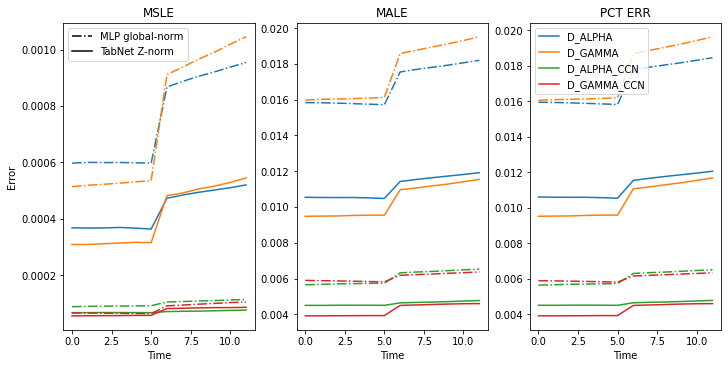

In [176]:

targcols = ["D_ALPHA","D_GAMMA","D_ALPHA_CCN","D_GAMMA_CCN"]
f,ax=plt.subplots(1,3,constrained_layout=True, sharex=True, figsize=(10,5))
# ax[0].plot(msle_list.mean(1))
# ax[1].plot(msae_list.mean(1),label=targcols)
# ax[2].plot(mpct_err_list.mean(1),label=targcols)

for i in range(4):
    ax[0].plot(msle_list_kd.mean(1)[:,i], ls='-',c=f'C{i}')
    ax[1].plot(msae_list_kd.mean(1)[:,i], ls='-',c=f'C{i}')
    ax[2].plot(mpct_err_list_kd.mean(1)[:,i], ls='-',c=f'C{i}',label=targcols[i])
    
for i in range(4):
    ax[0].plot(msle_list_mlp.mean(1)[:,i], ls='-.',c=f'C{i}')
    ax[1].plot(msae_list_mlp.mean(1)[:,i], ls='-.',c=f'C{i}')
    ax[2].plot(mpct_err_list_mlp.mean(1)[:,i], ls='-.',c=f'C{i}')

ax[0].set_title("MSLE")
ax[1].set_title("MALE")
ax[2].set_title("PCT ERR")

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[2].set_xlabel('Time')
ax[0].set_ylabel('Error')

ax[0].plot([],[],ls="-.",label="MLP global-norm", color='k')
# ax[0].plot([],[],label="TabNet global-norm", color='k')
ax[0].plot([],[],ls="-",label="TabNet Z-norm", color='k')
ax[0].legend(loc="upper left")

ax[2].legend()

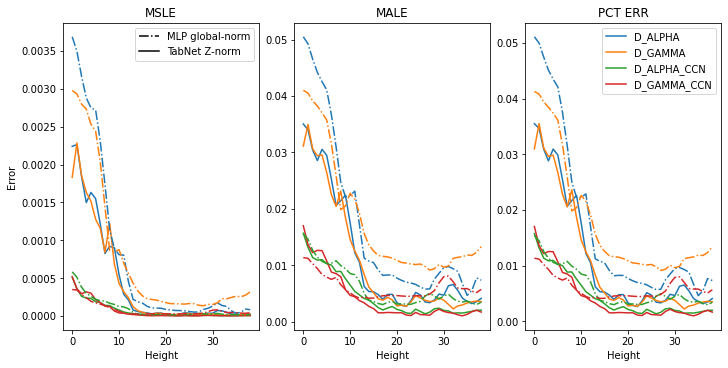

In [175]:
f,ax=plt.subplots(1,3,constrained_layout=True, sharex=True, figsize=(10,5))
# ax[0].plot(msle_list.mean(0))
# ax[1].plot(msae_list.mean(0),label=targcols)
# ax[2].plot(mpct_err_list.mean(0),label=targcols)

for i in range(4):
    ax[0].plot(msle_list_kd.mean(0)[:,i], ls='-',c=f'C{i}')
    ax[1].plot(msae_list_kd.mean(0)[:,i], ls='-',c=f'C{i}')
    ax[2].plot(mpct_err_list_kd.mean(0)[:,i], ls='-',c=f'C{i}',label=targcols[i])
    
for i in range(4):
    ax[0].plot(msle_list_mlp.mean(0)[:,i], ls='-.',c=f'C{i}')
    ax[1].plot(msae_list_mlp.mean(0)[:,i], ls='-.',c=f'C{i}')
    ax[2].plot(mpct_err_list_mlp.mean(0)[:,i], ls='-.',c=f'C{i}')

ax[0].set_title("MSLE")
ax[1].set_title("MALE")
ax[2].set_title("PCT ERR")

ax[0].set_xlabel('Height')
ax[1].set_xlabel('Height')
ax[2].set_xlabel('Height')
ax[0].set_ylabel('Error')

ax[0].plot([],[],ls="-.",label="MLP global-norm", color='k')
# ax[0].plot([],[],label="TabNet global-norm", color='k')
ax[0].plot([],[],ls="-",label="TabNet Z-norm", color='k')
ax[0].legend()


ax[2].legend()

In [158]:
msle_list.mean(),msae_list.mean(),mpct_err_list.mean()

(0.0002693011708082465, 0.010539709064218908, 0.010538405461194285)

In [159]:
msle_list_kd.mean(),msae_list_kd.mean(),mpct_err_list_kd.mean()

(0.01043360328146518, 0.07724815570532269, 0.07787782195401556)

In [160]:
msle_list_mlp.mean(),msae_list_mlp.mean(),mpct_err_list_mlp.mean()

(0.0004221298628504383, 0.011625679567760462, 0.011679867636427574)

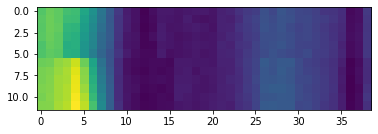

In [61]:
plt.imshow(mpct_err_list[:,:,2])

In [11]:
truth3d =  t.reshape(39,159,169,-1)
pred3d =  p.reshape(39,159,169,-1)
pctdiff_cube = np.abs(np.exp((truth3d - pred3d)* tstd) - 1)

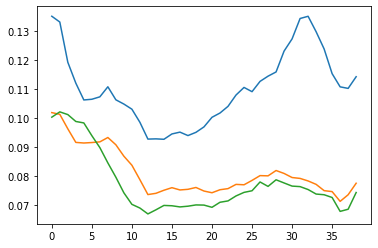

In [15]:
plt.plot(pctdiff_cube.mean(axis=(1,2)))


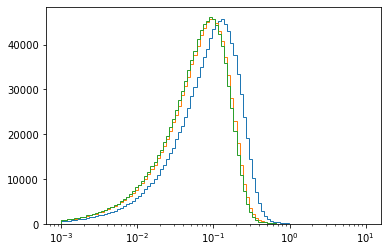

In [19]:
plt.hist(pctdiff_cube[...,0].flatten(),bins=np.logspace(-3,1,100), histtype='step')
plt.hist(pctdiff_cube[...,1].flatten(),bins=np.logspace(-3,1,100), histtype='step')
plt.hist(pctdiff_cube[...,2].flatten(),bins=np.logspace(-3,1,100), histtype='step')
plt.xscale('log')

In [27]:
# calculate the log mse

def mean_log_error(ytrue, ypred, tstd):
    # assume they are normalize
    msle = (((ytrue - ypred)*tstd)**2).mean(0)
    male = (np.abs((ytrue - ypred)*tstd)).mean(0)
    return msle, male

def mean_pct_error(ytrue, ypred, tstd):
    # assume they are normalize
    pctdiff = np.abs(np.exp((t - p)* tstd) - 1)
    return pctdiff.mean()

In [29]:
msle, msae = mean_log_error(t, p, tstd)
mpct_err = mean_pct_error(t, p, tstd)
print(msle, msae, mpct_err)

[0.01998514 0.01040909 0.00941835] [0.109066   0.07991089 0.0762824 ] 0.08969847632358907
